In [1]:
# Import Dependencies
import os
import pandas as pd
import numpy as np
import requests
import json
import pprint
import matplotlib.pyplot as plt
from scipy import stats
from config import (aqs_api_key)
from config import (email_address)
from datetime import date

# https://aqs.epa.gov/aqsweb/documents/data_api.html#signup for api information
pp = pprint.PrettyPrinter(indent = 4)
states_url = "https://aqs.epa.gov/data/api/list/states"
parameters_url = "https://aqs.epa.gov/data/api/list/classes"
daily_data_url = "https://aqs.epa.gov/data/api/dailyData/byState"
# state_data_url = https://aqs.epa.gov/data/api/dailyData/byState
p1 = {"email" : email_address, "key" : aqs_api_key}

# States to be used and their ID Codes, All in top 10 for worst congestion and traffic
California = "06"
Hawaii = "15"
District_of_Columbia = "11"
New_York = "36"
Massachusetts = "25"
Illinois = "17"

cali_data = []
hawaii19_data = []
hawaii20_data = []
ny_data = []
dc_data = []
mass_data = []
illinois_nd_19_data = []
illinois_nd_20_data = []
illinois_sd_19_data = []
illinois_sd_20_data = []
illinois_cm_19_data = []
illinois_cm_20_data = []

In [8]:
#Illinois 2019 and 2020 nitrogen dixodie

illinois_nd_19_params = {"email" : email_address, "key" : aqs_api_key, "param" : "42602", 
          "bdate" : "20190101", "edate" : "20191231", "state" : Illinois}
# # Call to url for Illinois 2019
illinois_nd_19_response = requests.get(daily_data_url, params = illinois_nd_19_params).json()
illinois_nd_19_data.append(illinois_nd_19_response)

illinois_nd_19_df = pd.DataFrame(illinois_nd_19_data[0]["Data"])

# create DF for Illinois 2020 and pull sulfur Data from APi
illinois_nd_20_params = {"email" : email_address, "key" : aqs_api_key, "param" : "42602", 
          "bdate" : "20200101", "edate" : "20200731", "state" : Illinois}

#call url for Illinois 2020
illinois_nd_20_response = requests.get(daily_data_url, params = illinois_nd_20_params).json()
illinois_nd_20_data.append(illinois_nd_20_response)

#create df for illinois 2020
illinois_nd_20_df = pd.DataFrame(illinois_nd_20_data[0]["Data"])
illinois_nd_20_df
#merge 2020
merge_illinois_nd_df = illinois_nd_19_df.append(illinois_nd_20_df)
merge_illinois_nd_df.head()








,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,sample_duration,...,method_code,method,local_site_name,site_address,state,county,city,cbsa_code,cbsa,date_of_last_change
0,17,031,4002,42602,1,41.855243,-87.75247,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,074,INSTRUMENTAL - CHEMILUMINESCENCE,COOK COUNTY TRAILER,1820 S. 51ST AVE.,Illinois,Cook,Cicero,16980,"Chicago-Naperville-Elgin, IL-IN-WI",2020-01-15
1,17,031,4002,42602,1,41.855243,-87.75247,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,074,INSTRUMENTAL - CHEMILUMINESCENCE,COOK COUNTY TRAILER,1820 S. 51ST AVE.,Illinois,Cook,Cicero,16980,"Chicago-Naperville-Elgin, IL-IN-WI",2020-01-15
2,17,031,4002,42602,1,41.855243,-87.75247,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,074,INSTRUMENTAL - CHEMILUMINESCENCE,COOK COUNTY TRAILER,1820 S. 51ST AVE.,Illinois,Cook,Cicero,16980,"Chicago-Naperville-Elgin, IL-IN-WI",2020-01-15
3,17,031,4002,42602,1,41.855243,-87.75247,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,074,INSTRUMENTAL - CHEMILUMINESCENCE,COOK COUNTY TRAILER,1820 S. 51ST AVE.,Illinois,Cook,Cicero,16980,"Chicago-Naperville-Elgin, IL-IN-WI",2020-01-15
4,17,031,4002,42602,1,41.855243,-87.75247,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,074,INSTRUMENTAL - CHEMILUMINESCENCE,COOK COUNTY TRAILER,1820 S. 51ST AVE.,Illinois,Cook,Cicero,16980,"Chicago-Naperville-Elgin, IL-IN-WI",2020-01-15


In [11]:
#drop columns in Illinois DF.nitrogen dioxide Show: site_number, latitude, longitude, sample_duration, date_local, observation_count, observation_percent, arithmetic_mean, first_max_value, first_max_hour, aqi, state, county, city)
illinois_nd_clean_df = merge_illinois_nd_df.drop(["parameter_code", "datum", "cbsa_code","poc", "method_code","local_site_name","event_type","validity_indicator","method_code","state_code","county_code","parameter","pollutant_standard","units_of_measure","method", "site_address","cbsa","date_of_last_change"], axis=1) 
illinois_nd_clean_df.head()

,site_number,latitude,longitude,sample_duration,date_local,observation_count,observation_percent,arithmetic_mean,first_max_value,first_max_hour,aqi,state,county,city
0,4002,41.855243,-87.75247,1 HOUR,2019-01-01,24,100.0,11.337500,19.3,22,18,Illinois,Cook,Cicero
1,4002,41.855243,-87.75247,1 HOUR,2019-01-01,24,100.0,11.337500,19.3,22,18,Illinois,Cook,Cicero
2,4002,41.855243,-87.75247,1 HOUR,2019-01-02,24,100.0,15.904167,31.8,1,29,Illinois,Cook,Cicero
3,4002,41.855243,-87.75247,1 HOUR,2019-01-02,24,100.0,15.904167,31.8,1,29,Illinois,Cook,Cicero
4,4002,41.855243,-87.75247,1 HOUR,2019-01-03,24,100.0,15.825000,23.7,16,22,Illinois,Cook,Cicero


In [13]:
#run nitrogen dioxideby 1 hour sample
sample_duration_nd = illinois_nd_clean_df["sample_duration"] == "1 HOUR"
sample_duration_nd

illinois_nd_clean_df = illinois_nd_clean_df[sample_duration_nd]
illinois_nd_clean_df.head()

,site_number,latitude,longitude,sample_duration,date_local,observation_count,observation_percent,arithmetic_mean,first_max_value,first_max_hour,aqi,state,county,city
0,4002,41.855243,-87.75247,1 HOUR,2019-01-01,24,100.0,11.337500,19.3,22,18,Illinois,Cook,Cicero
1,4002,41.855243,-87.75247,1 HOUR,2019-01-01,24,100.0,11.337500,19.3,22,18,Illinois,Cook,Cicero
2,4002,41.855243,-87.75247,1 HOUR,2019-01-02,24,100.0,15.904167,31.8,1,29,Illinois,Cook,Cicero
3,4002,41.855243,-87.75247,1 HOUR,2019-01-02,24,100.0,15.904167,31.8,1,29,Illinois,Cook,Cicero
4,4002,41.855243,-87.75247,1 HOUR,2019-01-03,24,100.0,15.825000,23.7,16,22,Illinois,Cook,Cicero


In [17]:
#group Iliinois data nitrogen dioxide in dataframe with groupby
illinois_nd_group = pd.DataFrame(illinois_nd_clean_df.groupby(["date_local","county"]).mean().unstack())
illinois_nd_group.index
#convert index to datetime
illinois_nd_group.index = pd.to_datetime(illinois_nd_group.index)
#average data by months
monthly_nd_averages = illinois_nd_group.resample('M').mean()
# elimiate nans
illinois_nd_df =monthly_nd_averages.fillna(0)
illinois_nd_df
# illinois_df.index

latitude                         longitude             \
county           Cook   Macoupin Saint Clair       Cook   Macoupin   
date_local                                                           
2019-01-31  41.877771  39.396075   38.612034 -87.793758 -89.809739   
2019-02-28  41.857279  39.396075   38.612034 -87.780741 -89.809739   
2019-03-31  41.787614  39.396075   38.612034 -87.724907 -89.809739   
2019-04-30  41.787614  39.396075   38.612034 -87.724907 -89.809739   
2019-05-31  41.787614  39.396075   38.612034 -87.724907 -89.809739   
2019-06-30  41.787614  39.396075   38.612034 -87.724907 -89.809739   
2019-07-31  41.792739  39.396075   38.612034 -87.722898 -89.809739   
2019-08-31  41.812385  39.396075   38.612034 -87.715195 -89.809739   
2019-09-30  41.814093  39.396075   38.612034 -87.714525 -89.809739   
2019-10-31  41.810676  39.396075   38.612034 -87.715864 -89.809739   
2019-11-30  41.805279  39.396075   38.612034 -87.705090 -89.809739   
2019-12-31  41.814093  39.396075   38.612034 -87.714525 -89.809739   
2020-01-31  41.814093  39.396075   38.612034 -87.714525 -89.809739   
2020-02-29  41.810185  39.396075   38.612034 -87.710342 -89.809739   
2020-03-31  41.814093  39.396075   38.612034 -87.714525 -89.809739   
2020-04-30  41.814093  39.396075   38.612034 -87.714525 -89.809739   
2020-05-31  41.814093  39.396075   38.612034 -87.714525 -89.809739   

                       observation_count                         \
county     Saint Clair              Cook   Macoupin Saint Clair   
date_local                                                        
2019-01-31  -90.160477         23.322581  23.451613   23.290323   
2019-02-28  -90.160477         23.464286  23.500000   21.357143   
2019-03-31  -90.160477         23.580645  23.516129   23.354839   
2019-04-30  -90.160477         23.558333  23.466667   23.333333   
2019-05-31  -90.160477         23.790323  22.709677   23.451613   
2019-06-30  -90.160477         23.775000  22.740741   21.642857   
2019-07-31  -90.160477         23.679032  23.516129   23.516129   
2019-08-31  -90.160477         23.359677  21.800000   17.416667   
2019-09-30  -90.160477         23.760000  22.400000   23.466667   
2019-10-31  -90.160477         23.145161  22.896552   23.516129   
2019-11-30  -90.160477         23.481667  22.608696   23.433333   
2019-12-31  -90.160477         23.387097  23.451613   23.387097   
2020-01-31  -90.160477         23.729032  22.290323   23.516129   
2020-02-29  -90.160477         23.634483  23.413793   23.413793   
2020-03-31  -90.160477         23.490323  23.483871   23.645161   
2020-04-30  -90.160477         23.660000  23.866667   23.400000   
2020-05-31  -90.160477         23.845161  23.774194   24.000000   

           observation_percent  ... arithmetic_mean first_max_value            \
county                    Cook  ...     Saint Clair            Cook  Macoupin   
date_local                      ...                                             
2019-01-31           97.236559  ...       10.312441       29.410753  5.009677   
2019-02-28           97.821429  ...       10.039823       32.672619  5.239286   
2019-03-31           98.306452  ...       11.658123       35.816935  4.954839   
2019-04-30           98.233333  ...        8.162715       29.869167  3.160000   
2019-05-31           99.161290  ...        5.385344       29.295968  5.270968   
2019-06-30           99.091667  ...        7.116464       26.197500  7.303704   
2019-07-31           98.691935  ...        6.876812       23.615806  7.264516   
2019-08-31           97.379032  ...        8.582589       26.261774  4.108000   
2019-09-30           99.040000  ...        7.264890       26.882000  4.225000   
2019-10-31           96.458065  ...        8.095518       26.201935  5.893103   
2019-11-30           97.880000  ...       10.028478       27.188000  8.130435   
2019-12-31           97.477419  ...       12.514623       27.996129  7.174194   
2020-01-31           98.903226  ...        9.200549     

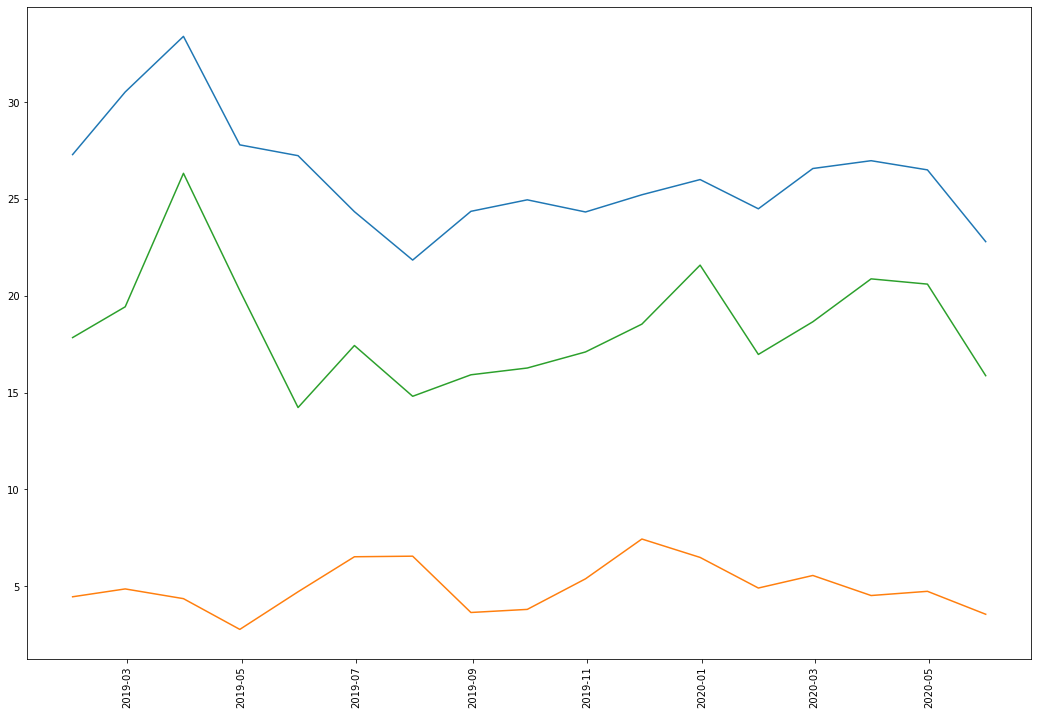

In [18]:
# #plot aqi against time for each county nitrogen dioxide in group by df
fig, ax = plt.subplots(figsize=(18,12))
plt.xticks(rotation = 90)
x_values = illinois_nd_df.index
y_values = illinois_nd_df['aqi']
plt.plot(x_values,y_values)
#needto add title, x axis labels include units of meausres, need to add legend for counties


In [22]:
# # Illinois 2019 and 2020 data for sulfur DIOXIDE

illinois_sd_19_params = {"email" : email_address, "key" : aqs_api_key, "param" : "42401", 
          "bdate" : "20190101", "edate" : "20191231", "state" : Illinois}
# # # Call to url for Illinois 2019
illinois_sd_19_response = requests.get(daily_data_url, params = illinois_sd_19_params).json()
illinois_sd_19_data.append(illinois_sd_19_response)

illinois_sd_19_df = pd.DataFrame(illinois_sd_19_data[0]["Data"])

# # create DF for Illinois 2020 and pull sulfur Data from APi
illinois_sd_20_params = {"email" : email_address, "key" : aqs_api_key, "param" : "42401", 
          "bdate" : "20200101", "edate" : "20200731", "state" : Illinois}

# #call url for Illinois 2020
illinois_sd_20_response = requests.get(daily_data_url, params = illinois_sd_20_params).json()
illinois_sd_20_data.append(illinois_sd_20_response)

# #create df for illinois 2020
illinois_sd_20_df = pd.DataFrame(illinois_sd_20_data[0]["Data"])
illinois_sd_20_df
#merge 2020
merge_illinois_sd_df = illinois_sd_19_df.append(illinois_sd_20_df)
merge_illinois_sd_df.head()



,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,sample_duration,...,method_code,method,local_site_name,site_address,state,county,city,cbsa_code,cbsa,date_of_last_change
0,17,179,0004,42401,2,40.55646,-89.654028,WGS84,Sulfur dioxide,1 HOUR,...,100,INSTRUMENTAL - ULTRAVIOLET FLUORESCENCE,FIRESTATION,272 DERBY,Illinois,Tazewell,Pekin,37900,"Peoria, IL",2020-01-15
1,17,179,0004,42401,2,40.55646,-89.654028,WGS84,Sulfur dioxide,1 HOUR,...,100,INSTRUMENTAL - ULTRAVIOLET FLUORESCENCE,FIRESTATION,272 DERBY,Illinois,Tazewell,Pekin,37900,"Peoria, IL",2020-01-15
2,17,179,0004,42401,2,40.55646,-89.654028,WGS84,Sulfur dioxide,24-HR BLK AVG,...,100,INSTRUMENTAL - ULTRAVIOLET FLUORESCENCE,FIRESTATION,272 DERBY,Illinois,Tazewell,Pekin,37900,"Peoria, IL",2020-01-15
3,17,179,0004,42401,2,40.55646,-89.654028,WGS84,Sulfur dioxide,3-HR BLK AVG,...,100,INSTRUMENTAL - ULTRAVIOLET FLUORESCENCE,FIRESTATION,272 DERBY,Illinois,Tazewell,Pekin,37900,"Peoria, IL",2020-01-15
4,17,179,0004,42401,2,40.55646,-89.654028,WGS84,Sulfur dioxide,1 HOUR,...,100,INSTRUMENTAL - ULTRAVIOLET FLUORESCENCE,FIRESTATION,272 DERBY,Illinois,Tazewell,Pekin,37900,"Peoria, IL",2020-01-15


In [23]:
# #drop columns in Illinois DF. Sulfur Dioxide Show: site_number, latitude, longitude, sample_duration, date_local, observation_count, observation_percent, arithmetic_mean, first_max_value, first_max_hour, aqi, state, county, city)
illinois_clean_sd_df = merge_illinois_sd_df.drop(["parameter_code", "datum", "cbsa_code","poc", "method_code","local_site_name","event_type","validity_indicator","method_code","state_code","county_code","parameter","pollutant_standard","units_of_measure","method", "site_address","cbsa","date_of_last_change"], axis=1) 
illinois_clean_sd_df

,site_number,latitude,longitude,sample_duration,date_local,observation_count,observation_percent,arithmetic_mean,first_max_value,first_max_hour,aqi,state,county,city
0,0004,40.556460,-89.654028,1 HOUR,2019-01-01,24,100.0,1.179167,2.0,9,3.0,Illinois,Tazewell,Pekin
1,0004,40.556460,-89.654028,1 HOUR,2019-01-01,24,100.0,1.179167,2.0,9,3.0,Illinois,Tazewell,Pekin
2,0004,40.556460,-89.654028,24-HR BLK AVG,2019-01-01,1,100.0,1.200000,1.2,23,NaN,Illinois,Tazewell,Pekin
3,0004,40.556460,-89.654028,3-HR BLK AVG,2019-01-01,8,100.0,1.137500,1.5,11,NaN,Illinois,Tazewell,Pekin
4,0004,40.556460,-89.654028,1 HOUR,2019-01-02,24,100.0,0.695833,1.0,2,1.0,Illinois,Tazewell,Pekin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8047,0117,39.880404,-88.894488,1 HOUR,2020-03-31,20,83.0,-0.140000,0.1,11,0.0,Illinois,Macon,Decatur
8048,0117,39.880404,-88.894488,24-HR BLK AVG,2020-03-31,1,100.0,-0.100000,-0.1,23,NaN,Illinois,Macon,Decatur
8049,0117,39.880404,-88.894488,3-HR BLK AVG,2020-03-31,6,75.0,-0.116667,0.0,11,NaN,Illinois,Macon,Decatur
8050,0117,39.880404,-88.894488,1 HOUR,2020-04-01,1,4.0,-0.200000,-0.2,0,0.0,Illinois,Macon,Decatur


In [26]:
# isolate data to 1 hour hour duration only sulfur dioxide

sample_duration_sd = illinois_clean_sd_df["sample_duration"] == "1 HOUR"
sample_duration_sd

illinois_clean_sd_df = illinois_clean_sd_df[sample_duration_sd]
illinois_clean_sd_df.head()



,site_number,latitude,longitude,sample_duration,date_local,observation_count,observation_percent,arithmetic_mean,first_max_value,first_max_hour,aqi,state,county,city
0,0004,40.55646,-89.654028,1 HOUR,2019-01-01,24,100.0,1.179167,2.0,9,3.0,Illinois,Tazewell,Pekin
1,0004,40.55646,-89.654028,1 HOUR,2019-01-01,24,100.0,1.179167,2.0,9,3.0,Illinois,Tazewell,Pekin
4,0004,40.55646,-89.654028,1 HOUR,2019-01-02,24,100.0,0.695833,1.0,2,1.0,Illinois,Tazewell,Pekin
5,0004,40.55646,-89.654028,1 HOUR,2019-01-02,24,100.0,0.695833,1.0,2,1.0,Illinois,Tazewell,Pekin
8,0004,40.55646,-89.654028,1 HOUR,2019-01-03,24,100.0,0.862500,1.3,4,1.0,Illinois,Tazewell,Pekin


In [27]:
#group Iliinois data sulfur dioxide in dataframe with groupby
illinois_group_sd = pd.DataFrame(illinois_clean_sd_df.groupby(["date_local","county"]).mean().unstack())
illinois_group_sd.index
#convert index to datetime
illinois_group_sd.index = pd.to_datetime(illinois_group_sd.index)
#average data by months
monthly_averages_sd = illinois_group_sd.resample('M').mean()
# elimiate nans
illinois_df_sd =monthly_averages_sd.fillna(0)
illinois_df_sd
illinois_df_sd.index

DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
               '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30'],
              dtype='datetime64[ns]', name='date_local', freq='M')

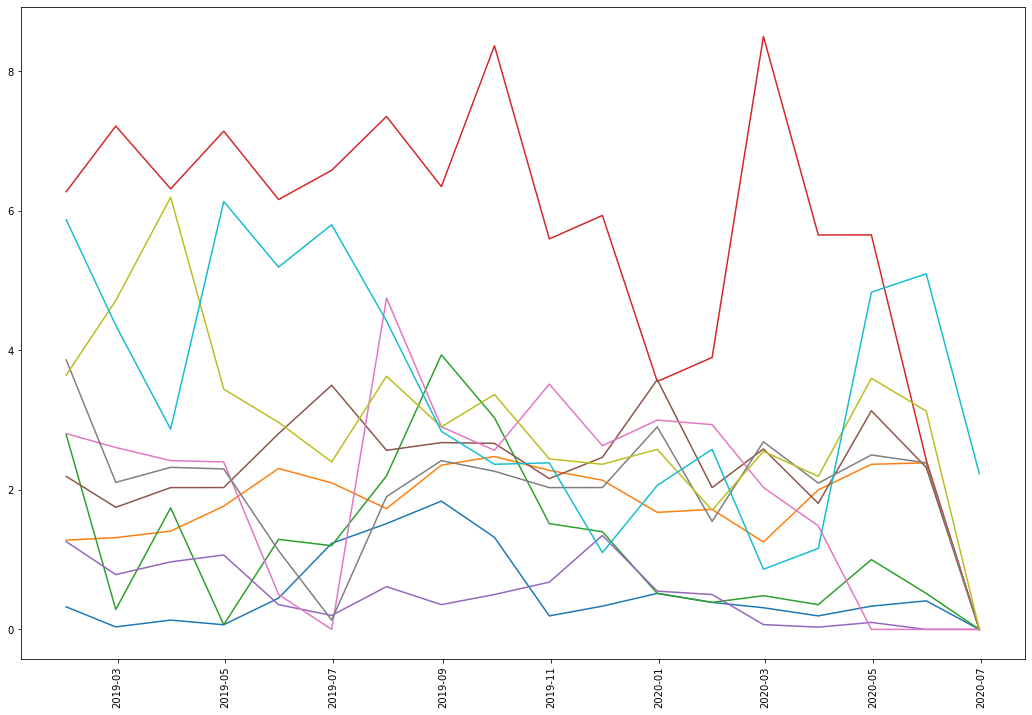

In [28]:
# #plot aqi against time for each county sulfur dioxide in group by df
fig, ax = plt.subplots(figsize=(18,12))
plt.xticks(rotation = 90)
x_values = illinois_df_sd.index
y_values = illinois_df_sd['aqi']
plt.plot(x_values,y_values)


In [31]:
# Create a DataFrame for Illinois 2019 and pull carbon monoxide data from API
illinois_cm_19_params = {"email" : email_address, "key" : aqs_api_key, "param" : "42101", 
          "bdate" : "20190101", "edate" : "20191231", "state" : Illinois}
# # Call to url for Illinois 2019
illinois_cm_19_response = requests.get(daily_data_url, params = illinois_cm_19_params).json()
illinois_cm_19_data.append(illinois_cm_19_response)

illinois_cm_19_df = pd.DataFrame(illinois_cm_19_data[0]["Data"])

#create DF for Illinois 2020 and pull Carbon Monoxide Data from APi
illinois_cm_20_params = {"email" : email_address, "key" : aqs_api_key, "param" : "42101", 
          "bdate" : "20200101", "edate" : "20200731", "state" : Illinois}

#call url for Illinois 2020
illinois_cm_20_response = requests.get(daily_data_url, params = illinois_cm_20_params).json()
illinois_cm_20_data.append(illinois_cm_20_response)

#create df for illinois 2020
illinois_cm_20_df = pd.DataFrame(illinois_cm_20_data[0]["Data"])
illinois_cm_20_df
#merge 2020
merge_illinois_cm_df = illinois_cm_19_df.append(illinois_cm_20_df)
merge_illinois_cm_df.head()

,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,sample_duration,...,method_code,method,local_site_name,site_address,state,county,city,cbsa_code,cbsa,date_of_last_change
0,17,163,0010,42101,1,38.612034,-90.160477,WGS84,Carbon monoxide,1 HOUR,...,054,INSTRUMENTAL - NONDISPERSIVE INFRARED,IEPA-RAPS TRAILER,13TH & TUDOR,Illinois,Saint Clair,East Saint Louis,41180,"St. Louis, MO-IL",2019-09-04
1,17,163,0010,42101,1,38.612034,-90.160477,WGS84,Carbon monoxide,8-HR RUN AVG END HOUR,...,054,INSTRUMENTAL - NONDISPERSIVE INFRARED,IEPA-RAPS TRAILER,13TH & TUDOR,Illinois,Saint Clair,East Saint Louis,41180,"St. Louis, MO-IL",2019-09-04
2,17,163,0010,42101,1,38.612034,-90.160477,WGS84,Carbon monoxide,1 HOUR,...,054,INSTRUMENTAL - NONDISPERSIVE INFRARED,IEPA-RAPS TRAILER,13TH & TUDOR,Illinois,Saint Clair,East Saint Louis,41180,"St. Louis, MO-IL",2019-09-04
3,17,163,0010,42101,1,38.612034,-90.160477,WGS84,Carbon monoxide,8-HR RUN AVG END HOUR,...,054,INSTRUMENTAL - NONDISPERSIVE INFRARED,IEPA-RAPS TRAILER,13TH & TUDOR,Illinois,Saint Clair,East Saint Louis,41180,"St. Louis, MO-IL",2019-09-04
4,17,163,0010,42101,1,38.612034,-90.160477,WGS84,Carbon monoxide,1 HOUR,...,054,INSTRUMENTAL - NONDISPERSIVE INFRARED,IEPA-RAPS TRAILER,13TH & TUDOR,Illinois,Saint Clair,East Saint Louis,41180,"St. Louis, MO-IL",2019-09-04


In [44]:
#drop columns in Illinois DF. Carbon Monoxide Show: site_number, latitude, longitude, sample_duration, date_local, observation_count, observation_percent, arithmetic_mean, first_max_value, first_max_hour, aqi, state, county, city)
illinois_clean_cm_df = merge_illinois_cm_df.drop(["parameter_code", "datum", "cbsa_code","poc", "method_code","local_site_name","event_type","validity_indicator","method_code","state_code","county_code","parameter","pollutant_standard","units_of_measure","method", "site_address","cbsa","date_of_last_change"], axis=1) 
illinois_clean_cm_df.head()

,site_number,latitude,longitude,sample_duration,date_local,observation_count,observation_percent,arithmetic_mean,first_max_value,first_max_hour,aqi,state,county,city
0,0010,38.612034,-90.160477,1 HOUR,2019-01-01,24,100.0,0.183333,0.2,4,NaN,Illinois,Saint Clair,East Saint Louis
1,0010,38.612034,-90.160477,8-HR RUN AVG END HOUR,2019-01-01,19,79.0,0.189474,0.2,7,2.0,Illinois,Saint Clair,East Saint Louis
2,0010,38.612034,-90.160477,1 HOUR,2019-01-02,24,100.0,0.195833,0.3,7,NaN,Illinois,Saint Clair,East Saint Louis
3,0010,38.612034,-90.160477,8-HR RUN AVG END HOUR,2019-01-02,24,100.0,0.200000,0.2,0,2.0,Illinois,Saint Clair,East Saint Louis
4,0010,38.612034,-90.160477,1 HOUR,2019-01-03,24,100.0,0.425000,1.5,21,NaN,Illinois,Saint Clair,East Saint Louis


In [45]:
# isolate data to 8 hour duration only carbond monoxide

sample_duration_cm = illinois_clean_cm_df["sample_duration"] == "8-HR RUN AVG END HOUR"
sample_duration_cm

illinois_clean_cm_df = illinois_clean_cm_df[sample_duration_cm]
illinois_clean_cm_df.head()



# illinois_clean_df["aqi"].fillna(0)
# illinois_clean_df

,site_number,latitude,longitude,sample_duration,date_local,observation_count,observation_percent,arithmetic_mean,first_max_value,first_max_hour,aqi,state,county,city
1,0010,38.612034,-90.160477,8-HR RUN AVG END HOUR,2019-01-01,19,79.0,0.189474,0.2,7,2.0,Illinois,Saint Clair,East Saint Louis
3,0010,38.612034,-90.160477,8-HR RUN AVG END HOUR,2019-01-02,24,100.0,0.200000,0.2,0,2.0,Illinois,Saint Clair,East Saint Louis
5,0010,38.612034,-90.160477,8-HR RUN AVG END HOUR,2019-01-03,24,100.0,0.304167,0.8,23,9.0,Illinois,Saint Clair,East Saint Louis
7,0010,38.612034,-90.160477,8-HR RUN AVG END HOUR,2019-01-04,24,100.0,0.558333,0.9,1,10.0,Illinois,Saint Clair,East Saint Louis
9,0010,38.612034,-90.160477,8-HR RUN AVG END HOUR,2019-01-05,24,100.0,0.420833,0.8,22,9.0,Illinois,Saint Clair,East Saint Louis


In [46]:
#group Iliinois carbon monoxide data in dataframe with groupby
illinois_group_cm= pd.DataFrame(illinois_clean_cm_df.groupby(["date_local","county"]).mean().unstack())
illinois_group_cm.index
#convert index to datetime
illinois_group_cm.index = pd.to_datetime(illinois_group_cm.index)
#average data by months
monthly_averages_cm = illinois_group_cm.resample('M').mean()
# elimiate nans
illinois_cm_df =monthly_averages_cm.fillna(0)
illinois_cm_df
# illinois_cm_df.index


latitude                        longitude                         \
county     Champaign       Cook Saint Clair Champaign       Cook Saint Clair   
date_local                                                                     
2019-01-31   0.00000  42.139996   38.612034   0.00000 -87.799227  -90.160477   
2019-02-28   0.00000  42.139996   38.612034   0.00000 -87.799227  -90.160477   
2019-03-31   0.00000  41.895526   38.612034   0.00000 -87.693918  -90.160477   
2019-04-30   0.00000  41.756389   38.612034   0.00000 -87.633983  -90.160477   
2019-05-31   0.00000  41.859308   38.612034   0.00000 -87.678317  -90.160477   
2019-06-30   0.00000  41.784458   38.612034   0.00000 -87.646074  -90.160477   
2019-07-31   0.00000  41.868362   38.612034   0.00000 -87.682217  -90.160477   
2019-08-31  40.05278  41.895526   38.612034 -88.37251 -87.693918  -90.160477   
2019-09-30   0.00000  41.859308   38.612034   0.00000 -87.678316  -90.160477   
2019-10-31   0.00000  41.859308    0.000000   0.00000 -87.678317    0.000000   
2019-11-30   0.00000  41.859308    0.000000   0.00000 -87.678316    0.000000   
2019-12-31   0.00000  41.859308    0.000000   0.00000 -87.678317    0.000000   
2020-01-31  40.05278  41.859308    0.000000 -88.37251 -87.678317    0.000000   
2020-02-29  40.05278  41.956097    0.000000 -88.37251 -87.720010    0.000000   
2020-03-31  40.05278  41.949853    0.000000 -88.37251 -87.717320    0.000000   
2020-04-30  40.05278  41.906089    0.000000 -88.37251 -87.698468    0.000000   
2020-05-31  40.05278  41.777818    0.000000 -88.37251 -87.643213    0.000000   
2020-06-30  40.05278  41.578620    0.000000 -88.37251 -87.557406    0.000000   

           observation_count                        observation_percent  ...  \
county             Champaign       Cook Saint Clair           Champaign  ...   
date_local                                                               ...   
2019-01-31          0.000000  22.967742   23.290323            0.000000  ...   
2019-02-28          0.000000  20.500000   22.571429            0.000000  ...   
2019-03-31          0.000000  21.548387   24.000000            0.000000  ...   
2019-04-30          0.000000  23.300000   24.000000            0.000000  ...   
2019-05-31          0.000000  23.274194   24.000000            0.000000  ...   
2019-06-30          0.000000  22.516667   24.000000            0.000000  ...   
2019-07-31          0.000000  23.467742   24.000000            0.000000  ...   
2019-08-31         20.333333  23.532258   23.709677           84.800000  ...   
2019-09-30          0.000000  24.000000    2.000000            0.000000  ...   
2019-10-31          0.000000  24.000000    0.000000            0.000000  ...   
2019-11-30          0.000000  23.766667    0.000000            0.000000  ...   
2019-12-31          0.000000  23.870968    0.000000            0.000000  ...   
2020-01-31         17.000000  23.838710    0.000000           71.000000  ...   
2020-02-29         20.125000  23.706897    0.000000           83.833333  ...   
2020-03-31         21.666667  21.983871    0.000000           90.300000  ...   
2020-04-30         22.925926  23.533333    0.000000           95.518519  ...   
2020-05-31         20.520000  23.709677    0.000000           85.520000  ...   
2020-06-30          2.000000   2.000000    0.000000            8.000000  ...   

           arithmetic_mean first_max_value                        \
county         Saint Clair       Champaign      Cook Saint Clair   
date_local                                                         
2019-01-31        0.284378        0.000000  0.383871    0.406452   
2019-02-28        0.278910        0.000000  0.381250    0.357143   
2019-03-31        0.318279        0.000000  0.411290    0.458065   
2019-04-30        0.335417        0.000000  0.425000    0.483333   
2019-05-31        0.351747        0.000000  0.396774    0.451613   
2019-06-30        0.379722        0.000000  0.465000    0.473333   
2019-07-31        0.413038        0.00

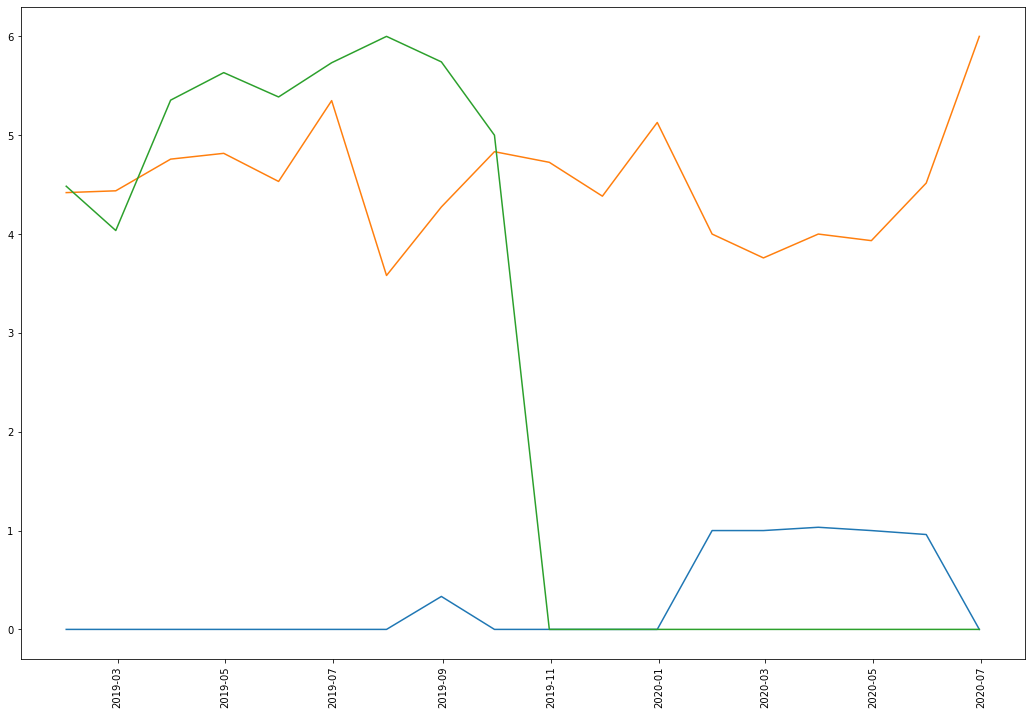

In [47]:
#plot aqi against time for each county cardbon monoxide in group by df
fig, ax = plt.subplots(figsize=(18,12))
plt.xticks(rotation = 90)
x_values = illinois_cm_df.index
y_values = illinois_cm_df['aqi']
plt.plot(x_values,y_values)


In [ ]:
#Hawaii 2019 and 2020 call for data 
# Create a DataFrame for Hawaii 2019 and pull carbon monoxide data from API
# hawaii19_params = {"email" : email_address, "key" : aqs_api_key, "param" : "42101", 
#           "bdate" : "20190101", "edate" : "20191231", "state" : Hawaii}
# # # Call to url for 2019
# hawaii19_response = requests.get(daily_data_url, params = hawaii19_params).json()
# hawaii19_data.append(hawaii19_response)

# hawaii19_df = pd.DataFrame(hawaii19_data[0]["Data"])
# # # # Call to url

# hawaii20_params = {"email" : email_address, "key" : aqs_api_key, "param" : "42101", 
#           "bdate" : "20200101", "edate" : "20200731", "state" : Hawaii}
# hawaii20_response = requests.get(daily_data_url, params = hawaii20_params).json()
# hawaii20_data.append(hawaii20_response)

# hawaii20_df = pd.DataFrame(hawaii20_data[0]["Data"])
# hawaii20_df
# merge_hawaii_df = hawaii19_df.append(hawaii20_df)
# merge_hawaii_df

In [ ]:
#Hawaii
# clean up and create new data frame 
#columns needed state_code, site_number, paramter_code, parameter, latitude, longitude, sample_duration (8 Hour Avg  Begin Hour vs 1 Hour),date_local, observation_count, arithmetic_mean, first_max_value, first_max_hour, aqi)

# hawaii_clean_df = merge_hawaii_df.drop(["parameter_code", "datum", "cbsa_code","poc", "method_code","local_site_name","event_type","validity_indicator","method_code","state_code","county_code","parameter","pollutant_standard","units_of_measure","method", "site_address","cbsa"], axis=1) 
# hawaii_clean_df

In [ ]:
# Hawaii
# sample_duration = hawaii_clean_df["sample_duration"] == "8-HR RUN AVG END HOUR"
# sample_duration

# hawaii_clean_df = hawaii_clean_df[sample_duration]
# hawaii_clean_df



# hawaii_clean_df["aqi"].fillna(0)
# hawaii_clean_df

In [ ]:
# hawaii_group = pd.DataFrame(hawaii_clean_df.groupby(["date_local", "site_number"]).mean().unstack())
# hawaii_group.index
# hawaii_group.index = pd.to_datetime(hawaii_group.index)
# monthly_averages = hawaii_group.resample('M').mean()
# monthly_averages
# hawaii_group
# hawaii_group.index


In [ ]:
# hawaii_clean_df =hawaii_clean_df.rename(columns={ "state_code":"State Code", "site_number":"Site Number", "latitude":"Latitude","longitude":"Longitude", "parameter":"Parameter", "sample_duration": "Sample Duration", "date_local":"Date Local", "observation_count": "Observation Count", "arithmetic_mean":"Arithmetic Mean", "first_max_value":"First Maximum Value", "first_max_hour":"First Maximum Hour", "aqi":"AQI"})
# hawaii_clean_df.head()

In [ ]:
#only show 8 hour samples then sort 8 hour samples by arthimetic mean greatest to smallest 

# hawaii_sort_df = hawaii_clean_df.loc[hawaii_clean_df["Sample Duration"] == "8-HR RUN AVG END HOUR", :]
# hawaii_sort_df

# hawaii["Date Local"] = pd.to_datetime(df["Date Local"])

# hawaii_am_df = hawaii_sort_df.sort_values("AQI", ascending = False)
# hawaii_am_df


In [ ]:
#create line graph for the days over time againist the arithmetic mean for 

# hawaii_am_df 

# fig, ax = plt.subplots(figsize = (18,12))
# sns.lineplot(x ="date_local", y = "aqi", data = df, ax= ax)

# sns.lineplot
# fig, ax = plt.subplots(figsize=(18,12))
# plt.xticks(rotation = 90)
# x_values = hawaii_group.index
# y_values = hawaii_group['aqi']
# plt.plot(x_values,y_values)


# # Plot the world average as a line chart
# world_avg, = plt.plot(years, average_unemployment, color="blue", label="World Average" )

# # Plot the unemployment values for a single country
# country_one, = plt.plot(years, combined_unemployed_data.loc['USA',["2010","2011","2012","2013","2014"]], 
#                         color="green",label=combined_unemployed_data.loc['USA',"Country Name"])

# # Create a handle for each plot
# fahrenheit, = plt.plot(x_axis, points_F, marker="+",color="blue", linewidth=1, label="Fahreneit")
# celcius, = plt.plot(x_axis, points_C, marker="s", color="Red", linewidth=1, label="Celcius")

In [ ]:

# import os
# import pandas as pd
# import requests
# import json
# import pprint
# from config import (AQS_API_Key)
# from EAconfig import (email_address)



# # https://aqs.epa.gov/aqsweb/documents/data_api.html#signup for api information
# pp = pprint.PrettyPrinter(indent = 4)
# states_url = "https://aqs.epa.gov/data/api/list/states"
# parameters_url = "https://aqs.epa.gov/data/api/list/classes"
# sample_data_url = "https://aqs.epa.gov/data/api/dailyData/byState"
# p1 = {"email" : email_address, "key" : AQS_API_Key}


In [ ]:
# #states for data gathering
# California = "06"
# Hawai = "15"
# District_of_Columbia = "11"
# New_York = "36"
# Massachusetts = "25"

# open_data = []
# cali_data = []
# hawaii_data = []
# ny_data = []
# dc_data = []
# mass_data = []



In [ ]:
# for state in state_dir: 
#     params = {"email" : email_address, "key" : AQS_API_Key, "param" : "44201", 
#           "bdate" : "20200101", "edate" : "20200801", "state" : "06"}
#     response = requests.get(sample_data_url, params = params)
#     open_data.append (response)

# df = 
    

In [ ]:
# cali_parms = {"email" : email_address, "key" : AQS_API_Key, "param" : "44201", "bdate" : "20200101", "edate" : "20200801", "state" : "06"}
# cali_response = requests.get(sample_data_url,cali_parms).json()
# cali_data.append(cali_response)

# cali_df = pd.DataFrame(cali_data[0]["Data"])
# cali_df.head()

In [ ]:
# state_list = response.json()
# pp.pprint(state_list)

In [ ]:
# df = pd.DataFrame(state_list["Data"])


# # with open(sta

# # df = pd.read_json(state_list)
# df.to_csv('../BootcampProject1/data.csv', index = None)

# # df = pd.read_csv("data.csv")          
# # df.head()
# # name.head()